# Tensores y Autovalores

Este código cálcula los momentos centrados de orden 0, 1, y 2 para una serie de datos. Estos datos incluyen las posiciones de un sistema de partículas y los porcentajes del PIB en Colombia usados en defensa, salud, educación, y ciencia y tecnología en los últimos años. Además, para cada matriz de covarianza asociada se encuentran los autovalores y autovectores de dicha matriz.

Autores: \
Juan Andrés Guarín Rojas, 2200815.\
Juan Diego Figueroa Hernandez, 2201870.

Este programa se estructura en el siguiente orden:

* [1. Importación de librerías.](#section-1)
* [2. Sistema de partículas.](#section-2)
    * [2.1 Caso 2D.](#section-2.1)
    * [2.2 Caso 3D.](#section-2.2)
* [3. PIB.](#section-3)

## 1. Importación de librerías  <a class="anchor" id="section-1"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp

#%matplotlib auto

## 2. Sistema de partículas <a class="anchor" id="section-2"></a>

### 2.1 Caso 2D <a class="anchor" id="section-2.1"></a>

Esta sección se estructura de la siguiente manera:

* Lectura de datos.
* Cálculo de los momentos centrados.
* Determinación de los autovalores y autovectores.

### Lectura de datos

In [2]:
df = pd.read_csv('datosmasas.csv')
df = df.set_index('particula')
df

,masas,x,y,z
particula,,,,
1,2.0,-53.0,79.0,-91.0
2,2.0,13.0,-142.0,-177.0
3,2.0,-109.0,-103.0,-120.0
4,2.0,4.0,-96.0,110.0
5,4.0,222.0,-22.0,-236.0
...,...,...,...,...
1529,3.0,1646.0,1612.0,-30.0
1530,2.0,1610.0,1650.0,-145.0
1531,5.0,1626.0,1537.0,96.0


### Calculo de momentos centrados

Momento de orden 0.

In [3]:
# se suman todos los pesos de las partículas
nu_0 = sum(df['masas'].values)
print("nu_0 = ",nu_0)

nu_0 =  4627.0


Momento de orden 1.

In [4]:
# Se hallan algunos parametros
m = df['masas'].values                 # Vector con las masas.
N = np.size(m)                         # No. de partículas.

# Se halla el promedio en x y y.
p = np.array([sum(df['x'].values)/N, 
              sum(df['y'].values)/N])

# Se halla la matriz con las posiciones y el momento 1.
X = df.loc[:,'x':'y'].values         # Matriz 1533x2 con los datos de posición.
nu_1 = np.dot(m, X - p)              # "X-p" significa que a cada fila de X se le resta el vector p.

# Se divide entre la suma de masas para que nu_1 sea el centro de masas exacto.
nu_1 = nu_1 / sum(m)      

print("nu_1 = ",nu_1)

nu_1 =  [3.84130767 1.04833255]


Momento de orden 2

In [5]:
# Se declaran algunos parametros.
nu_2 = np.zeros((2,2))
x = df.loc[:,'x'].values  
y = df.loc[:,'y'].values  

# Se hallan las componentes de la matriz del momento 2.
nu_2[0][0] = np.dot(m,(x - p[0])**2)  # x-p[0] indica que a cada componente de x se le resta el escalar p[0],
                                      # (x-p[0])**2 indica que cada componente de (x-p[0]) se eleva al cuadrado.
nu_2[0][1] = np.dot(m,(x - p[0])*(y - p[1])) #(x-p[0])*(y-p[1]) indica multiplicacion componente a componente.
nu_2[1][0] = np.dot(m,(y - p[1])*(x - p[0])) 
nu_2[1][1] = np.dot(m,(y - p[1])**2) 

#Se modifica nu_2 para que sea el tensor de inercia.
nu_2[0][1] = -nu_2[0][1]
nu_2[1][0] = -nu_2[1][0]
aux = nu_2[0][0]
nu_2[0][0] = nu_2[1][1]
nu_2[1][1] = aux

#Mostrando resultados.
print("nu_2 = \n",nu_2)

nu_2 = 
 [[ 9.63665233e+08 -9.11766544e+08]
 [-9.11766544e+08  9.58603863e+08]]


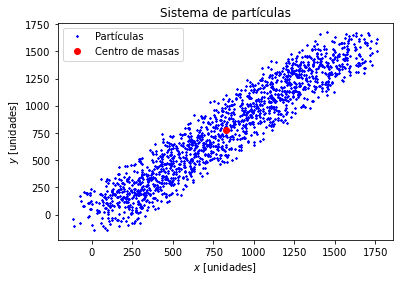

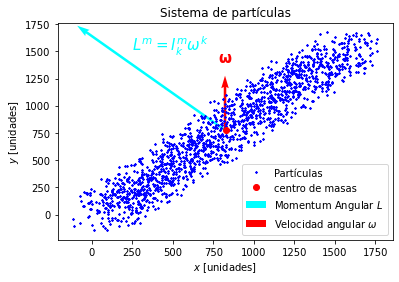

Centro de masas: [825.82, 776.92]

Centro geométrico: [821.97, 775.87]

Velocidad angular:
 w =  [[0]
 [1]]

Momentum lineal: 
L =  [[-9.11766544e+08]
 [ 9.58603863e+08]]


In [6]:
#Se grafica centro de masas y partículas.
plt.figure(figsize=(6,4))                                           # Tamaño de imagen de (6,4).
plt.plot(x,y, '*b', markersize=2, label="Partículas")               # Gráfica de las partículas.
plt.plot(nu_1[0]+p[0],nu_1[1]+p[1],'or',label="Centro de masas")    # Se le suman las coordenadas de p al centro de masas, pues 
                                                                        # nu_1, fue calculado en un sistema de coordenadas centrado en p
plt.legend()
plt.title('Sistema de partículas')
plt.xlabel(r'$x$ [unidades]')
plt.ylabel(r'$y$ [unidades]')    
plt.show()

#Se grafica centro de masas, partículas y el vector de momentum angular usando el tensor de inercia.

plt.figure(figsize=(6,4))
plt.plot(x,y, '*b', markersize=2,label="Partículas")
plt.plot(nu_1[0]+p[0],nu_1[1]+p[1],'or',label="centro de masas")

# Se calcula el momentum angular
w = np.array([[0],[1]])   #Un pseudovector de velocidad angular
L = np.dot(nu_2,w)        #El vector de momentum angular total del sistema, con la velocidad angular dada
plt.quiver(p[0],p[1],L[0]/1e6,L[1]/1e6,color='cyan',angles='xy', scale_units='xy', scale=1, label=r"Momentum Angular $L$")
plt.quiver(p[0],p[1],500*w[0],500*w[1],color='red',angles='xy', scale_units='xy', scale=1, label =r"Velocidad angular $\omega$")
plt.legend(loc=4)

# Se muetra texto en pantalla
plt.text(780, 1400, r'$\bf{\omega}$', fontsize=15, color='red')
plt.text(250, 1500, r'$L^{m}=I^{m}_{k} \omega^{k}$', fontsize=15, color='cyan')

plt.title('Sistema de partículas')
plt.xlabel(r'$x$ [unidades]')
plt.ylabel(r'$y$ [unidades]')
plt.savefig('Sistema de particulas.png',dpi=200)
plt.show()

print("Centro de masas: [{}, {}]".format(np.round(nu_1[0]+p[0],2),np.round(nu_1[1]+p[1],2)))
print("\nCentro geométrico: [{}, {}]".format(np.round(p[0],2),np.round(p[1],2)))
print("\nVelocidad angular:\n w = ",w)
print("\nMomentum lineal: \nL = ",L)

## Determinación de los autovalores y autovectores

In [7]:
e,v = np.linalg.eig(nu_2)
v1 = v[:,0].reshape((2,1))               #autovector uno
v2 = v[:,1].reshape((2,1))               #autovector dos

print("Autovalores = ",e)
print("\nAutovectores = \n",v)

Autovalores =  [1.87290460e+09 4.93644922e+07]

Autovectores = 
 [[ 0.70808741  0.70612479]
 [-0.70612479  0.70808741]]


## Matriz de transformación

In [8]:
# Matriz de cambio de coordenadas de la base propia a la normal.
M = np.linalg.inv(v)
print("M = ",M)

M =  [[ 0.70808741 -0.70612479]
 [ 0.70612479  0.70808741]]


Se comprueba si al transformar los autovectores en la base cartesiana se obtienen los vectores con una componente 1 y las demás en cero.

In [9]:
v1_transf = np.dot(M,v1)
v2_transf = np.dot(M,v2)

print("\nV1 = ",v1_transf)
print("\nV2 = ",v2_transf)


V1 =  [[ 1.00000000e+00]
 [-1.11022302e-16]]

V2 =  [[-1.11022302e-16]
 [ 1.00000000e+00]]


# 2. Caso 3D

Esta sección se estructura de la siguiente manera:

* Cálculo de los momentos centrados.
* Determinación de los autovalores y autovectores.
* Matriz de transformación

### Calculo de momentos centrados en el espacio

#### Momento de orden 0

In [10]:
nu_0 = sum(df['masas'].values)

print("nu_0 = ",nu_0)

nu_0 =  4627.0


#### Momento de orden 1

In [11]:
m = df['masas'].values                 #Masas.
N = np.size(m)                         #Cantidad de partículas.
p = np.array([sum(df['x'].values)/N,   #Promedios en x,y.
              sum(df['y'].values)/N,
              sum(df['z'].values)/N])
X = df.loc[:,'x':'z'].values           #Matriz 1533x3 con los datos de posición.
nu_1 = np.dot(m, X - p)                #En este caso "X-p" significa que a cada fila de X se le resta el vector p.
nu_1 = nu_1 / sum(m)                   #Se divide entre la suma de las masas para que nu_1 sea el centro de masas exacto.

print("nu_1 = ",nu_1)

nu_1 =  [3.84130767 1.04833255 0.44007528]


#### Momento de orden 2

In [12]:
nu_2 = np.zeros((3,3))
x = df.loc[:,'x'].values  
y = df.loc[:,'y'].values 
z = df.loc[:,'z'].values 
nu_2[0][0] = np.dot(m,(x - p[0])**2)  #En este caso, x-p[0] indica que a cada componente de x se le resta p[0],
                                      #y además (x-p[0])**2 indica que cada componente de x se eleva al cuadrado.
nu_2[0][1] = np.dot(m,(x - p[0])*(y - p[1]))#En este caso, (x-p[0])*(y-p[1]) indica multiplicacion componente a componente.
nu_2[0][2] = np.dot(m,(x - p[0])*(z - p[2]))
nu_2[1][0] = np.dot(m,(y - p[1])*(x - p[0])) 
nu_2[1][1] = np.dot(m,(y - p[1])**2) 
nu_2[1][2] = np.dot(m,(y - p[1])*(z - p[2]))
nu_2[2][0] = np.dot(m,(z - p[2])*(x - p[0]))
nu_2[2][1] = np.dot(m,(z - p[2])*(y - p[1]))
nu_2[2][2] = np.dot(m,(z - p[2])**2)

print("nu_2 = ",nu_2)

nu_2 =  [[ 9.58603863e+08  9.11766544e+08 -7.13422686e+06]
 [ 9.11766544e+08  9.63665233e+08 -1.92746259e+06]
 [-7.13422686e+06 -1.92746259e+06  1.01844217e+08]]


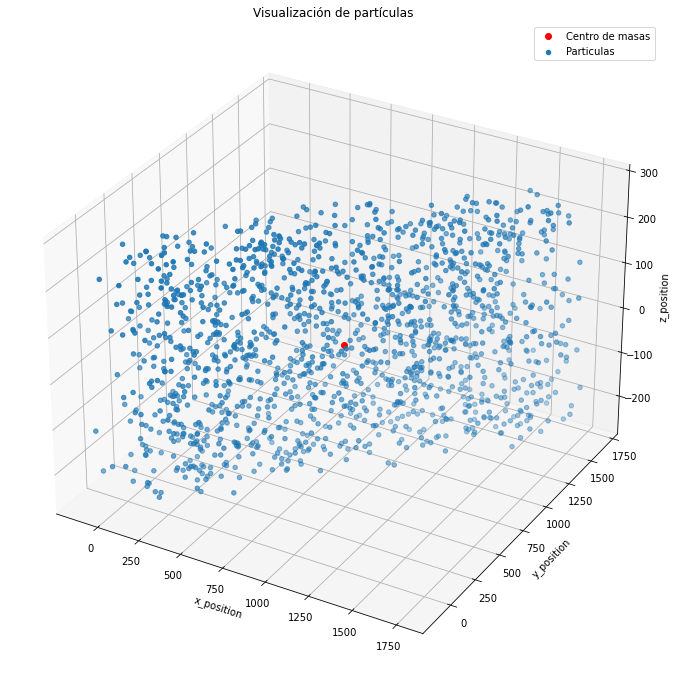

In [13]:
#Se grafica centro de masas y partículas.
plt.figure(figsize=(20,12))
ax = plt.axes(projection='3d')
scatter = ax.scatter3D(x,y,z, cmap='Greens',label='Particulas')
plt.plot(nu_1[0]+p[0],nu_1[1]+p[1],nu_1[2],'or',label="Centro de masas") 
ax.set_xlabel('x_position')
ax.set_ylabel('y_position')
ax.set_zlabel('z_position')
ax.set_title('Visualización de partículas')
plt.legend()
plt.show()

Centro de masas: [825.82, 776.92, 15.5]

Centro geométrico: [821.974, 775.87, 15.063]

Velocidad angular:
 w =  [[0]
 [1]
 [2]]

Momentum lineal: 
L =  [[8.97498090e+08]
 [9.59810308e+08]
 [2.01760971e+08]]


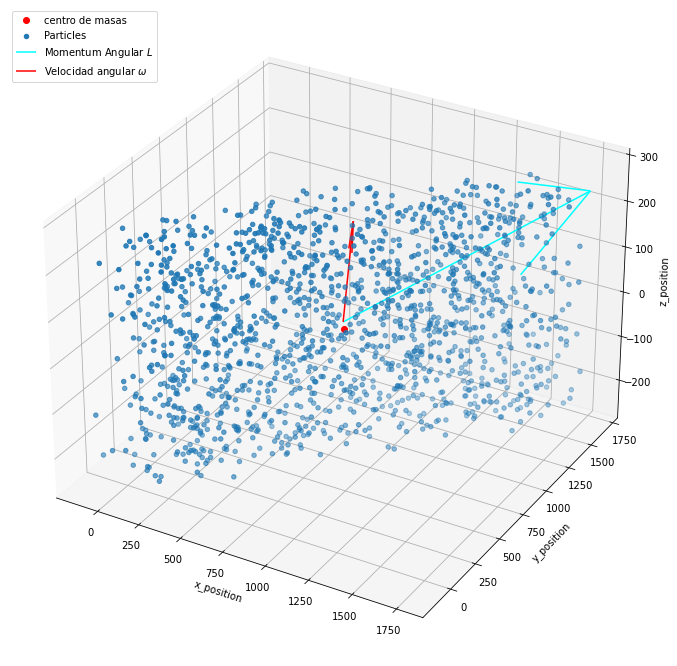

In [14]:
#Se grafica centro de masas, partículas y el vector de momentum angular usando el tensor de inercia.

plt.figure(figsize=(20,12))
ax = plt.axes(projection='3d')
scatter = ax.scatter3D(x,y,z, cmap='Greens',label='Particles')
plt.plot(nu_1[0]+p[0],nu_1[1]+p[1],'or',label="centro de masas")
ax.set_xlabel('x_position')
ax.set_ylabel('y_position')
ax.set_zlabel('z_position')

# Se calcula el momentum angular
w = np.array([[0],[1],[2]])   #Un pseudovector de velocidad angular
L = np.dot(nu_2,w)        #El vector de momentum angular total del sistema, con la velocidad angular dada
plt.quiver(p[0],p[1],p[2],L[0]/1e6,L[1]/1e6,L[2]/1e6,color='cyan', label=r"Momentum Angular $L$")
plt.quiver(p[0],p[1],p[2],100*w[0],100*w[1],100*w[2],color='red',  label =r"Velocidad angular $\omega$")
plt.legend(loc=2)


print("Centro de masas: [{}, {}, {}]".format(np.round(nu_1[0]+p[0],2),np.round(nu_1[1]+p[1],2),np.round(nu_1[2]+p[2],2)))
print("\nCentro geométrico: [{}, {}, {}]".format(np.round(p[0],3),np.round(p[1],3),np.round(p[2],3)))
print("\nVelocidad angular:\n w = ",w)
print("\nMomentum lineal: \nL = ",L)

## Determinación de los autovalores y autovectores

In [15]:
E,V = np.linalg.eig(nu_2)
V1 = V[:,0].reshape((3,1))               #autovector uno
V2 = V[:,1].reshape((3,1))               #autovector dos
V3 = V[:,2].reshape((3,1))               #autovector tres
print("Autovalores = ",E)
print("\nAutovectores = \n",V)

Autovalores =  [1.87292775e+09 4.91061110e+07 1.02079453e+08]

Autovectores = 
 [[ 0.70612535  0.70653155 -0.04690577]
 [ 0.70807762 -0.70422699  0.05186931]
 [-0.00361499  0.06983916  0.99755171]]


## Matriz de transformación

In [16]:
# Matriz de cambio de coordenadas de la base propia a la normal.
M = np.linalg.inv(V)
print("M = ",M)

M =  [[ 0.70612535  0.70807762 -0.00361499]
 [ 0.70653155 -0.70422699  0.06983916]
 [-0.04690577  0.05186931  0.99755171]]


 Se comprueba si al transformar los autovectores se obtienen los vectores con una componente 1 y las demás en cero

In [17]:
V1_transf = np.dot(M,V1)
V2_transf = np.dot(M,V2)
V3_transf = np.dot(M,V3)

print("\nV1 = ",V1_transf)
print("\nV2 = ",V2_transf)
print("\nV3 = ",V3_transf)


V1 =  [[ 1.00000000e+00]
 [-5.55111512e-17]
 [ 0.00000000e+00]]

V2 =  [[-5.55111512e-17]
 [ 1.00000000e+00]
 [ 6.93889390e-18]]

V3 =  [[6.9388939e-18]
 [0.0000000e+00]
 [1.0000000e+00]]


# 3. PIB

Esta sección se estructura de la siguiente manera:

* Lectura de datos.
* Cálculo de la matriz de covarianza y correlación.
* Determinación de los autovalores y autovectores.
* Matriz de Transformación del Espacio Normal al Espacio Propio.

### Lectura de datos

In [18]:
DF = pd.read_csv('porcentages_pib.csv')
DF = DF.set_index('index')
DF

,year,defense,health,education,science and technology
index,,,,,
1,2004,3.465015,5.798928,4.07935,0.15353
2,2005,3.352873,6.067098,4.02099,0.15086
3,2006,3.276131,6.335515,3.91672,0.14950
4,2007,3.266740,6.491028,4.08301,0.18455
5,2008,3.744606,6.841927,3.93878,0.20125
6,2009,3.885354,7.311347,4.77652,0.19608
7,2010,3.642756,7.071301,4.83383,0.19501
8,2011,3.081614,6.780768,4.46608,0.20595
9,2012,3.158960,6.745996,4.37039,0.23378


### Cálculo de la matriz de covarianza y correlación

Matriz de covarianza: cov = 
 [[ 0.94495027 -0.451933   -0.00736043 -0.08856462]
 [-0.451933    4.64968509  1.68248451  0.3044009 ]
 [-0.00736043  1.68248451  1.44143567  0.13665563]
 [-0.08856462  0.3044009   0.13665563  0.03508754]]

Matriz de correlación: corr = 
 [[ 1.         -0.2156045  -0.00630668 -0.48638404]
 [-0.2156045   1.          0.64989272  0.75362919]
 [-0.00630668  0.64989272  1.          0.60764995]
 [-0.48638404  0.75362919  0.60764995  1.        ]]


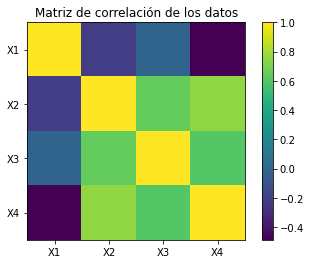

In [19]:
#Matriz de covarianza, usando el momento centrado de orden 2.
years = DF['year'].values
N = np.size(years)                           #Cantidad de años.
P = np.array([sum(DF['defense'].values)/N,   #Promedios en defensa, salud, educacion, y ciencia y tecnología.
              sum(DF['health'].values)/N,
              sum(DF['education'].values)/N,
              sum(DF['science and technology'].values)/N])


X1 = DF['defense'].values #Datos de defensa para todos los años.
X2 = DF['health'].values
X3 = DF['education'].values
X4 = DF['science and technology'].values

cov = np.zeros((4,4))            #matriz de covarianza.
cov[0][0] = sum((X1 - P[0])**2)  #En este caso, X1-P[0] indica que a cada componente de X1 se le resta P[0],
                                 #y aX1más (X1-P[0])**2 indica que cada componente de (X1-P[0]) se eleva al cuadrado.
cov[1][1] = sum((X2 - P[1])**2) 
cov[2][2] = sum((X3 - P[2])**2) 
cov[3][3] = sum((X4 - P[3])**2) 

cov[0][1] = sum((X1 - P[0])*(X2 - P[1])) #En este caso, (X1-P[0])*(X2-P[1]) indica multiplicacion componente a componente.
cov[0][2] = sum((X1 - P[0])*(X3 - P[2]))
cov[0][3] = sum((X1 - P[0])*(X4 - P[3])) 

cov[1][0] = sum((X2 - P[1])*(X1 - P[0])) 
cov[1][2] = sum((X2 - P[1])*(X3 - P[2])) 
cov[1][3] = sum((X2 - P[1])*(X4 - P[3])) 

cov[2][0] = sum((X3 - P[2])*(X1 - P[0]))
cov[2][1] = sum((X3 - P[2])*(X2 - P[1])) 
cov[2][3] = sum((X3 - P[2])*(X4 - P[3])) 

cov[3][0] = sum((X4 - P[3])*(X1 - P[0])) 
cov[3][1] = sum((X4 - P[3])*(X2 - P[1])) 
cov[3][2] = sum((X4 - P[3])*(X3 - P[2])) 

#Matriz de correlación.
sigmas = [[np.sqrt(sum( (X1-P[0])**2 ))],  #Desviación estándar de los datos respecto a su promedio.
          [np.sqrt(sum( (X2-P[1])**2 ))],
          [np.sqrt(sum( (X3-P[2])**2 ))],
          [np.sqrt(sum( (X4-P[3])**2 ))]]

Sigma = np.dot(sigmas, np.transpose(sigmas))

corr = cov / Sigma           #En este caso, cov/Sigma indica división componente a componente.

#Mostrar resultados.
print("Matriz de covarianza: cov = \n",cov)
print("\nMatriz de correlación: corr = \n", corr)

plt.figure()
plt.title("Matriz de correlación de los datos")
plt.xticks(range(4),['X1','X2','X3','X4'])
plt.yticks(range(4),['X1','X2','X3','X4'])
plt.imshow(corr)
plt.colorbar()
plt.show()

### Determinación de los autovalores y autovectores

In [20]:
Eig,Val = np.linalg.eig(cov)
Vec1 = Val[:,0].reshape((4,1))        #Autovector uno.
Vec2 = Val[:,1].reshape((4,1))        #Autovector dos.
Vec3 = Val[:,2].reshape((4,1))        #Autovector tres.
Vec4 = Val[:,3].reshape((4,1))        #Autovector cuatro.

print("Autovalores = ",Eig)
print("\nAutovectores = \n",Val)

Autovalores =  [5.43093764 1.00923497 0.62145049 0.00953547]

Autovectores = 
 [[ 0.09402548 -0.85626105 -0.50251671  0.07384556]
 [-0.91465725  0.12102433 -0.38345273 -0.04146357]
 [-0.388067   -0.50009899  0.77278639 -0.04589344]
 [-0.06297087  0.04550954  0.05693992  0.99534989]]


### Matriz de Transformación del Espacio Normal al Espacio Propio.

In [21]:
# Matriz de cambio de coordenadas de la base propia a la normal.
M = np.linalg.inv(Val)
print("M = ",M)

M =  [[ 0.09402548 -0.91465725 -0.388067   -0.06297087]
 [-0.85626105  0.12102433 -0.50009899  0.04550954]
 [-0.50251671 -0.38345273  0.77278639  0.05693992]
 [ 0.07384556 -0.04146357 -0.04589344  0.99534989]]


Se comprueba si al transformar los autovectores se obtienen los vectores con una componente 1 y las demás en cero

In [22]:
V1_transf = np.dot(M,Vec1)
V2_transf = np.dot(M,Vec2)
V3_transf = np.dot(M,Vec3)
V4_transf = np.dot(M,Vec4)

print("\nV1 = ",V1_transf)
print("\nV2 = ",V2_transf)
print("\nV3 = ",V3_transf)
print("\nV4 = ",V4_transf)


V1 =  [[ 1.00000000e+00]
 [-5.55111512e-17]
 [ 5.55111512e-17]
 [ 0.00000000e+00]]

V2 =  [[ 0.00000000e+00]
 [ 1.00000000e+00]
 [ 1.11022302e-16]
 [-2.77555756e-17]]

V3 =  [[-1.11022302e-16]
 [ 1.11022302e-16]
 [ 1.00000000e+00]
 [-6.93889390e-18]]

V4 =  [[-6.93889390e-18]
 [-1.38777878e-17]
 [-6.93889390e-18]
 [ 1.00000000e+00]]
